In [5]:
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import models
from keras import layers

Matplotlib is building the font cache; this may take a moment.


In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [7]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
print(test_images[1].shape)

(28, 28)


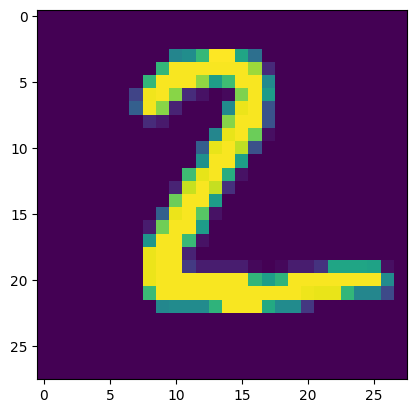

In [9]:
plt.imshow(test_images[1])